### Openstreetmaps information analysis 

Here we focus on several tasks:


    1. finding schools for given random location (lat, lon) or address in radius 1km from there
    2. searching for empty spaces on OSM with missing information and highlighting places on a map where there is no information about contacts or emails (contribution with humanitarian OSM https://www.hotosm.org/)
    3. comparison of schools distribution and their spatial characteristics in different countries
    

We start with the example of a code using openstreetmap library. Code is using github repositories from 
1. https://github.com/gboeing/osmnx-examples/blob/master/notebooks/10-building-footprints.ipynb
2. https://osmnx.readthedocs.io/en/stable/osmnx.html 

In [1]:
import json # requests for APIs
import requests #load Python code that allow us to work with the JSON data format and the HTTP protocol

import matplotlib.pyplot as plt
import osmnx as ox
from IPython.display import Image
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__




# configure the inline image display
img_folder = 'images'
extension = 'png'
size = 240


gdf = ox.footprints.footprints_from_place(place='Piedmont, California, USA')
gdf_proj = ox.project_gdf(gdf)
fig, ax = ox.footprints.plot_footprints(gdf_proj, bgcolor='#333333', color='w', 
                            save=True, show=False, close=True, filename='piedmont_bldgs', dpi=40)
Image('{}/{}.{}'.format(img_folder, 'piedmont_bldgs', extension), height=size, width=size)


print('Entering coordinates of your location ')
lat = 48
lon = 2 
#location = (lat, lon) #location should be a tuple
point = (lat, lon) #(48.873446, 2.294255)
dist = 612 #distance from the point on a map
#gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
#gdf_proj = ox.project_gdf(gdf)
#bbox = ox.bbox_from_point(point=point, distance=dist, project_utm=True)



Entering coordinates of your location 


## 1. Finding schools for given random location

Location can be given by (lat, lon) or address. We also give $R$ radius, e.g. 1km from that location. 
We start with calculation of map with buildings (hospitals, schools, etc.) given that coordinate.
We set a point with coordinates, then we plot and highlight all buildings on a map surrounding that point.

In [10]:
import json # requests for APIs
import requests #load Python code that allow us to work with the JSON data format and the HTTP protocol

import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np


#specify location of point on a map
point = (48.9, 2.3) #(44, 2.5) #Paris 
dist = 612 # distance radius
gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
gdf_proj = ox.project_gdf(gdf)
bbox = ox.bbox_from_point(point=point, distance=dist, project_utm=True)
fig, ax = ox.footprints.plot_footprints(gdf_proj, bgcolor='#333333', color='w', figsize=(4,4), bbox=bbox,
                            save=True, show=False, close=True, filename='paris_buildings', dpi=90)
Image('{}/{}.{}'.format(img_folder, 'paris_buildings', extension), height=size, width=size)
plt.show()



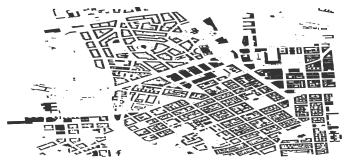

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b395f51748>)

In [16]:

import json # requests for APIs
import requests #load Python code that allow us to work with the JSON data format and the HTTP protocol

import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

'''
input: 
address is address of a point,  address (string) – the address to geocode to a lat-long point
distance from that point in meters
Return type: GeoDataFrame
'''

#find locations and description of schools around that point given address 
address = 'Kamppi, Helsinki, Finland'
distance = 1000 

point_surround = ox.footprints.footprints_from_address(address, distance, footprint_type='building', retain_invalid=False)

# plot a GeoDataFrame of footprints.
ox.footprints.plot_footprints(point_surround, fig=None, ax=None, figsize=None, color='#333333', bgcolor='w', set_bounds=True, bbox=None, save=False, show=True, close=False, filename='image', file_format='png', dpi=600)



### 2. Searching for empty spaces on OSM 

The algorithm for the calculation of identification of missing information from openstreetmap is simple: 

0. print('getting information from the first column of addresses')
s_addr = schools.iloc[:,1].values

1. identify missing information: we calculate number of NaN values in the column 
print('calculating number of NaNs for schools')
miss_info = s_addr.isna().sum()

2. if there are more than half of points with missing information, then print error message
if miss_info > len(miss_info)*1./2: 
    print("area has many missing values")
    #send request to OSM community 

In [15]:
import json # requests for APIs
import requests #load Python code that allow us to work with the JSON data format and the HTTP protocol

import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np

def school_info(name_city_distr): 
    ''' given city district get information about schools there
    phone or email, 
    availability of data 
    format of name_city_distr "Kamppi, Helsinki, Finland"
    
    name_city_distr must be a shapely Polygon or MultiPolygon. If you requested graph from place name or address, make sure your query resolves to a Polygon or MultiPolygon, and not some other geometry, like a Point. See OSMnx documentation for details.
    '''
    
    place_name = name_city_distr # e.g. "Kamppi, Helsinki, Finland"
    
    # Fetch OSM street network from the location
    graph = ox.graph_from_place(place_name)
    type(graph)

    print('loading graph of city')

    # Plot the streets
#    fig, ax = ox.plot_graph(graph)


    # Retrieve the footprint of our location
    area = ox.gdf_from_place(place_name)
    print('loading places')
    

    # Retrieve schools
    schools = ox.pois_from_place(place_name, amenities=['school'])

    # How many schools do we have in this district?
    len(schools)

    # Available columns and names of amenity we are searching for
    print(schools.columns)    # not all places have the same columns!!!
    
    cols = schools.columns
    #cols = ['access', 'contact:email', 'contact:phone',         'addr:housenumber', 'addr:street', 'education'] #, 'addr:postcode' 'addr:country',

    print(schools[cols].head(20))
    
    s_addr = schools.iloc[:,1].values #values in the first column

    # identify missing information: we calculate number of NaN values in the column 
    print('calculating number of NaNs for schools')
    print('object element ', s_addr[2])
    if s_addr[2]=='nan':
        print('nan')
    num_miss_info = np.where(s_addr =='nan')#np.where(np.isnan(s_addr))
#    print(miss_info)
    #miss_info = s_addr.isna().sum()
    
    return  schools  # returns dataframe and object with cols

    
def print_map_graph(place):
    
    place_name = name_city_distr # e.g. "Kamppi, Helsinki, Finland"


    # Fetch OSM street network from the location
    graph = ox.graph_from_place(place_name)
    type(graph)

    print('loading graph of city')

    # Plot the streets
    fig, ax = ox.plot_graph(graph)


In [36]:
# load schools from the city
name_city = 'Tver, Russia'

# load information about schools 
schools = school_info(name_city) 




loading graph of city
loading places
Index(['addr:city', 'addr:housenumber', 'addr:street', 'amenity', 'barrier',
       'bicycle', 'education', 'education_form:parttime',
       'education_level:primary', 'education_profile:visual_art',
       'education_system:ru_standard', 'element_type', 'entrance', 'foot',
       'geometry', 'horse', 'license_classes', 'motor_vehicle', 'motorcar',
       'motorcycle', 'name', 'opening_hours', 'osmid', 'school', 'training',
       'website', 'addr:country', 'addr:postcode', 'building',
       'building:levels', 'email', 'fence_type', 'landuse', 'name:en', 'nodes',
       'official_name', 'old_name', 'phone', 'wheelchair', 'wikidata',
       'wikipedia', 'type', 'ways'],
      dtype='object')
           addr:city addr:housenumber              addr:street  \
254979174        NaN              NaN                      NaN   
254979451        NaN              NaN                      NaN   
254979618        NaN              NaN                      NaN 

In [42]:
a =('nan', 0)

num_nun = np.where(a == 'nan')
print(num_nun) 

(array([], dtype=int64),)
